In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#1. Reading the dataset
ds1=pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [ ]:
#2. Finding the shape(col/rows) of the dataset
ds1.shape

(1338, 7)

Indicates 7 columns & 1338 rows

In [ ]:
#3. Displays the datatype of columns
ds1.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
#4. Check whether any column has missing value
print(ds1.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Observations: Data shows, there is no missing values present in the column

<ipython-input-7-94e5d738b9ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=ds1, x='smoker',col='sex', sharey=True, height=4, aspect=0.5, palette='rocket',kind='count')


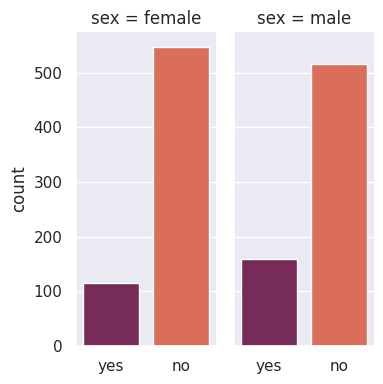

In [ ]:
#5. Relationship between smokers/non-smokers, Sex(M/F)- Categorical columns
sns.set()
g = sns.catplot(data=ds1, x='smoker',col='sex', sharey=True, height=4, aspect=0.5, palette='rocket',kind='count')
g.set(xlabel='')
plt.tight_layout()
plt.show()

Observations: The plot shows, the count of number of smokers/non-smokers among males & same as that of females

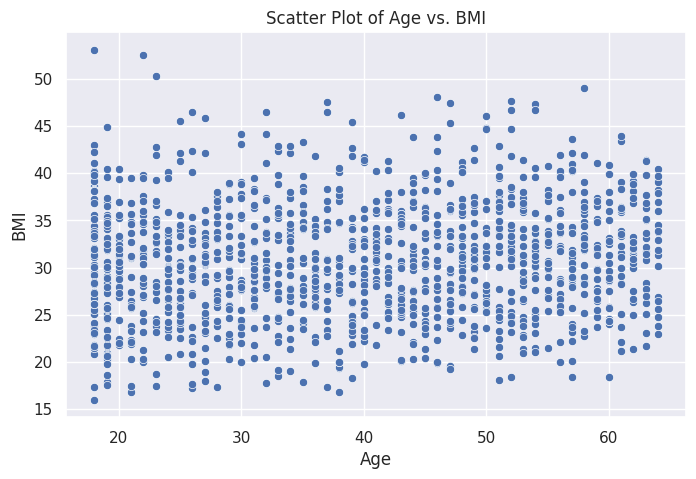

In [ ]:
#6. Relationship between Age & BMI (numerical columns) of persons using a scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='bmi', data=ds1)
plt.title('Scatter Plot of Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

Observations: From the scatter plot, it is observed that BMI does not consistently increase or decrease, as age increases

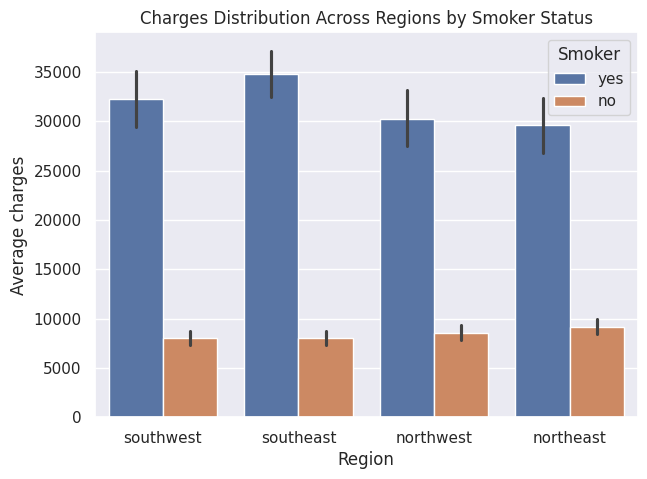

In [ ]:
#7. To visualize  how premium charges vary across different regions (feature vs feature)

plt.figure(figsize=(7,5))
sns.barplot(x='region', y='charges', hue='smoker', data=ds1)
plt.title('Charges Distribution Across Regions by Smoker Status')
plt.xlabel('Region')
plt.ylabel('Average charges')
plt.legend(title='Smoker')
plt.show()

Observation: The barplot calculates, the mean of the charges of smokers/ non-smokers across different regions. This indicates, the avg chgs of smokers in south-east region is the highest. It also clearly defines, the premium to be paid incase of smokers will be higher than non-smokers



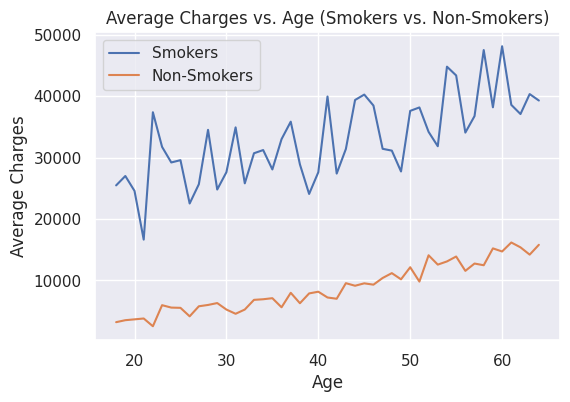

In [ ]:
#8: To check whether premium chgs for smokers/ non-smokers is increasing as age is increasing

smokers_chgs = ds1[ds1['smoker'] == 'yes']['charges']
non_smokers_chgs = ds1[ds1['smoker'] == 'no']['charges']

# Group by age and calculating mean
smokers_avg_chgs = smokers_chgs.groupby(ds1['age']).mean()
non_smokers_avg_chgs = non_smokers_chgs.groupby(ds1['age']).mean()

plt.figure(figsize=(6,4))
plt.plot(smokers_avg_chgs.index, smokers_avg_chgs.values, label='Smokers')
plt.plot(non_smokers_avg_chgs.index, non_smokers_avg_chgs.values, label='Non-Smokers')
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Average Charges vs. Age (Smokers vs. Non-Smokers)')
plt.legend()
plt.grid(True)
plt.show()

Observations: From the plot, we could find an upward trend in the average charges vs age. As age increases, the premium charges for smokers/ non-smokers also increases. This indicates that the smokers are having  high risk in health factors when compared with that of non-smokers